#### 4. When the number of features $p$ is large, there tends to be a deterioration in the performance of $\operatorname{KNN}$ and other local approaches that perform prediction using only observations that are near the test observation for which a prediction must be made. This phenomenon is known as the curse of dimensionality, and it ties into the fact that non-parametric approaches often perform poorly when $p$ is large. We will now investigate this curse.
1. Suppose that we have a set of observations, each with measurements on $p = 1$ feature, $X$. We assume that $X$ is uniformly (evenly) distributed on $[0, 1]$. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within $10 \%$ of the range of $X$ closest to that test observation. For instance, in order to predict the response for a test observation with $X = 0.6$, we will use observations in the range $[0.55, 0.65]$. On average, what fraction of the available observations will we use to make the prediction?
2. Now suppose that we have a set of observations, each with measurements on $p = 2$ features, $X_1$ and $X_2$. We assume that $(X_1, X_2)$ are uniformly distributed on $[0, 1] \times [0, 1]$. We wish to predict a test observation’s response using only observations that are within $10 \%$ of the range of $X_1$ and within $10 \%$ of the range of $X_2$ closest to that test observation. For instance, in order to predict the response for a test observation with $X_1 = 0.6$ and $X_2 = 0.35$, we will use observations in the range $[0.55, 0.65]$ for $X_1$ and in the range $[0.3, 0.4]$ for $X_2$ . On average, what fraction of the available observations will we use to make the prediction?
3. Now suppose that we have a set of observations on $p = 100$ features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from $0$ to $1$. We wish to predict a test observation’s response using observations within the $10 \%$ of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?
4. Using your answers to parts (1)–(3), argue that a drawback of $\operatorname{KNN}$ when $p$ is large is that there are very few training observations "near" any given test observation.
5. Now suppose that we wish to make a prediction for a test observation by creating a $p$-dimensional hypercube centered around the test observation that contains, on average, $10 \%$ of the training observations. For $p = 1, 2,$ and $100$, what is the length of each side of the hypercube? Comment on your answer. Note: A hypercube is a generalization of a cube to an arbitrary number of dimensions. When $p = 1$, a hypercube is simply a line segment, when $p = 2$ it is a square, and when $p = 100$ it is a $100$-dimensional cube.

## 1

Suppose that we have $n$ observations then we expect (because $X \sim U(0, 1)$) that the number of observations in the range $[X - 0.05, X + 0.05]$ is $0.1n$. The fraction of the available observations will be $\frac{0.1n}{n} = 0.1$, i.e., $10 \%$.

## 2

We can solve this using the lebesgue measure
$$
\mu^2([0.55, 0.65] \times [0.3, 0.4]) / \mu^2([0, 1]^2) = (0.65 - 0.55) \cdot (0.4 - 0.3) / ((1-0)^2) = 0.1 \cdot 0.1 = 0.01,
$$
so we're only looking at $1 \%$ of the observations.

## 3

$$
\frac{\mu^p\left(\prod_{i = 1}^p [x_i - 0.05, x_i + 0.05]\right)}{\mu^p([0, 1]^p)} = \prod_{i = 1}^p \mu([x_i - 0.05, x­_i + 0.05]) = 0.1^p.
$$

## 4

Text(0.5, 1.0, 'Log plot of $10^{-p}$')

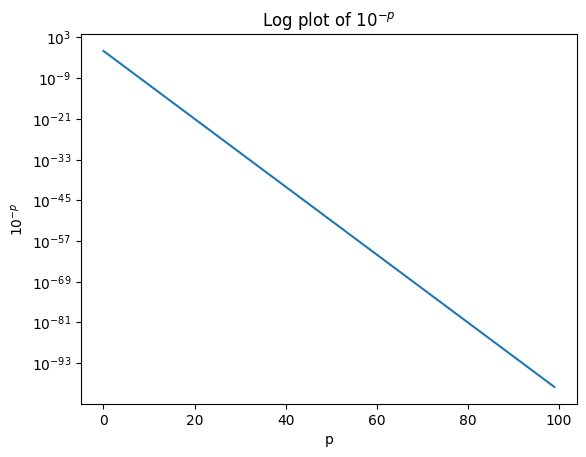

In [19]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.ones(n) * 0.1
y = x**(np.arange(n) + 1)
plt.semilogy(range(n), y)
plt.xlabel("p")
plt.ylabel("$10^{-p}$")
plt.title("Log plot of $10^{-p}$")

## 5

We want to have intervalls $I_i^n := [x_i - \delta_n , x_i + \delta_n]$, the hypercube is then defined by
$$
Q^{(n)} := \prod_{i = 1}^p I_i^n
$$
and its measure is
$$
\mu^n(Q^{(n)}) = \prod_{i = 1}^p \mu(I_i^n) = \delta_n^p.
$$

For this to be equal to $0.1$ we need to solve this equation
$$
\delta_n^p = 0.1 \iff \delta_n = 0.1^{1/p}.
$$

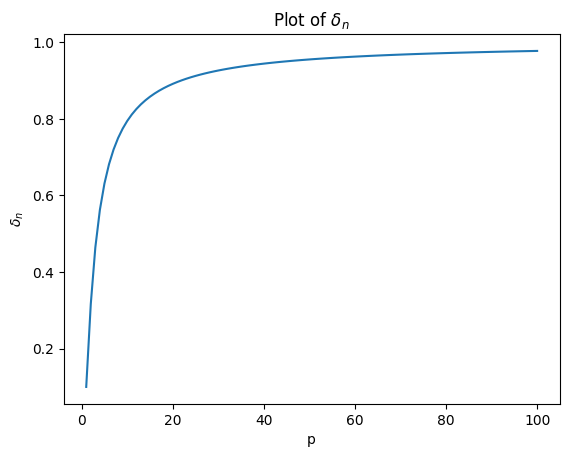

In [32]:
p = np.arange(100) + 1
delta_n = 10**(-1 / p)
plt.plot(p, delta_n)
plt.xlabel("p")
plt.ylabel("$\delta_n$")
plt.title("Plot of $\delta_n$")
plt.savefig("04_04_01.png")